In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import numpy as np

## to transform the labels to a CSV

In [2]:
# Function to parse the text file and convert it to CSV
def convert_to_csv(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile, delimiter=',')
        writer = csv.writer(outfile)

        # Write header row
        writer.writerow(['ColumnNum', 'Character_of_background_tissue', 'Class_of_abnormality_present', 
                         'Severity_of_abnormality', 'x', 'y', 'radius'])

        # Skip the first line since it contains column names
        next(reader)

        # Write data rows
        for row in reader:
            # Pad the row if it doesn't contain all columns
            if len(row) < 7:
                row.extend([''] * (7 - len(row)))
            writer.writerow(row)

# Example usage
input_file = 'labels.txt'
output_file = 'labelsCsv.csv'
convert_to_csv(input_file, output_file)

In [3]:
input_file = 'labels.txt'
output_file = 'labelsCsv.csv'
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter=',')
    writer = csv.writer(outfile)

    # Write header row
    writer.writerow(['ColumnNum', 'Character_of_background_tissue', 'Class_of_abnormality_present', 
                     'Severity_of_abnormality', 'x', 'y', 'radius'])

    # Skip the first line since it contains column names
    next(reader)

    # Write data rows
    for row in reader:
        split=row[0].split(" ")
        i=0
        if(len(split)>=5):
            if(split[4]=="*NOTE"):
                continue
            elif(int(split[4])>512 or int(split[5])>512):
                continue
        if(split[3]==""):
            split[3]="N"
        newRow=[]
        if len(split)<7:
            i=len(split)
            while i<7:
                split+=[-1]
                i+=1
        else:
            split[4:]=list(map(int, split[4:]))

        print(split)
        writer.writerow(split)


['mdb003', 'D', 'NORM', 'N', -1, -1, -1]
['mdb004', 'D', 'NORM', 'N', -1, -1, -1]
['mdb005', 'F', 'CIRC', 'B', 477, 133, 30]
['mdb005', 'F', 'CIRC', 'B', 500, 168, 26]
['mdb006', 'F', 'NORM', 'N', -1, -1, -1]
['mdb007', 'G', 'NORM', 'N', -1, -1, -1]
['mdb008', 'G', 'NORM', 'N', -1, -1, -1]
['mdb009', 'F', 'NORM', 'N', -1, -1, -1]
['mdb011', 'F', 'NORM', 'N', -1, -1, -1]
['mdb012', 'F', 'CIRC', 'B', 471, 458, 40]
['mdb014', 'G', 'NORM', 'N', -1, -1, -1]
['mdb016', 'G', 'NORM', 'N', -1, -1, -1]
['mdb018', 'G', 'NORM', 'N', -1, -1, -1]
['mdb020', 'G', 'NORM', 'N', -1, -1, -1]
['mdb021', 'G', 'CIRC', 'B', 493, 125, 49]
['mdb022', 'G', 'NORM', 'N', -1, -1, -1]
['mdb024', 'G', 'NORM', 'N', -1, -1, -1]
['mdb026', 'F', 'NORM', 'N', -1, -1, -1]
['mdb027', 'F', 'NORM', 'N', -1, -1, -1]
['mdb028', 'F', 'CIRC', 'M', 338, 314, 56]
['mdb029', 'G', 'NORM', 'N', -1, -1, -1]
['mdb031', 'G', 'NORM', 'N', -1, -1, -1]
['mdb033', 'D', 'NORM', 'N', -1, -1, -1]
['mdb034', 'D', 'NORM', 'N', -1, -1, -1]
['mdb0

In [2]:
df=pd.read_csv("labelsCsv.csv")

In [7]:
#--------------------single render------------------
# Open the PNG image
image = Image.open("png/mdb005.png")

# Convert the image to a NumPy array
image_array = np.array(image)
image_array
def render_image_with_circle(image, center_x, center_y, radius):
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(image)

    # Create a circle patch
    circle = Circle((center_x, center_y), radius, edgecolor='red', facecolor='none')

    # Add the circle patch to the plot
    ax.add_patch(circle)

    # Set limits
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)

    plt.show()
center_x,center_y,radius = 500,168,26 # X-coordinate of the center of the circle

render_image_with_circle(image_array, center_x, center_y, radius)


In [8]:
(df["x"]!=-1).sum()

26

In [9]:
((df["x"]>512) | (df["y"]>512)).sum()

0

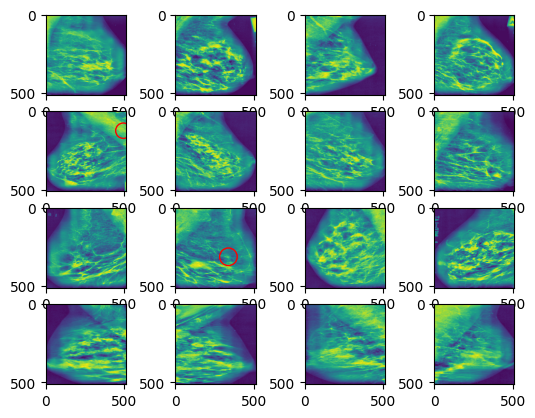

In [13]:
#--------------------multiple render-------------------

def render_image_with_circle(ax, image, center_x, center_y, radius):
    # Display the original image
    ax.imshow(image)

    # Create a circle patch
    circle = Circle((center_x, center_y), radius, edgecolor='red', facecolor='none')

    # Add the circle patch to the plot
    ax.add_patch(circle)

    # Set limits
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)

start=10
end=26
rows=df.iloc[start:end,:]
images = [np.array(Image.open(f"png/{_}.png")) for _ in rows["ColumnNum"].to_numpy() ]  # Example random images, replace them with your image data
centers_x = rows["x"].to_numpy()   # X-coordinates of the centers of the circles
centers_y = rows["y"].to_numpy()   # Y-coordinates of the centers of the circles
radii = rows["radius"].to_numpy() 

fig, axs = plt.subplots(4, 4)  # Create a 2x2 grid of subplots

for ax, image, center_x, center_y, radius in zip(axs.flatten(), images, centers_x, centers_y, radii):
    render_image_with_circle(ax, image, center_x, center_y, radius)

plt.show()


In [3]:
df

,ColumnNum,Character_of_background_tissue,Class_of_abnormality_present,Severity_of_abnormality,x,y,radius
0,mdb003,D,NORM,N,-1,-1,-1
1,mdb004,D,NORM,N,-1,-1,-1
2,mdb005,F,CIRC,B,477,133,30
3,mdb005,F,CIRC,B,500,168,26
4,mdb006,F,NORM,N,-1,-1,-1
...,...,...,...,...,...,...,...
229,mdb318,D,NORM,N,-1,-1,-1
230,mdb319,D,NORM,N,-1,-1,-1
231,mdb320,D,NORM,N,-1,-1,-1
232,mdb321,D,NORM,N,-1,-1,-1


In [16]:
for index, row in df.iterrows():
    # Construct the filename from the 'Names' column
    filename = f"labels/{row['ColumnNum']}.txt"
    content=""
    if(row["x"]!=-1):
        label= 1 if row["Class_of_abnormality_present"]!="NORM" else 0
        x,y,x_width,y_width=row['x']/512,row['y']/512,row["radius"]/512,row["radius"]/512
        content = f"{label} {x} {y} {x_width} {y_width}"


    with open(filename, 'w') as file:
        file.write(content)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=5)

for train_indices, test_indices in split.split(df,df[["Class_of_abnormality_present"]]):
    strat_train_set=df.loc[train_indices]
    strat_test_set=df.loc[test_indices]
    print("a") #makes sure there is only one yield
strat_train_set

a


,ColumnNum,Character_of_background_tissue,Class_of_abnormality_present,Severity_of_abnormality,x,y,radius
229,mdb318,D,NORM,N,-1,-1,-1
33,mdb044,G,NORM,N,-1,-1,-1
188,mdb275,G,NORM,N,-1,-1,-1
100,mdb131,F,NORM,N,-1,-1,-1
186,mdb273,F,NORM,N,-1,-1,-1
...,...,...,...,...,...,...,...
133,mdb182,G,NORM,N,-1,-1,-1
202,mdb289,D,NORM,N,-1,-1,-1
41,mdb052,G,NORM,N,-1,-1,-1
173,mdb255,F,NORM,N,-1,-1,-1


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=5)
strat_train_set=strat_train_set.reset_index()
for train_indices, test_indices in split.split(strat_train_set,strat_train_set[["Class_of_abnormality_present"]]):
    strat_train=strat_train_set.loc[train_indices]
    strat_val=strat_train_set.loc[test_indices]

strat_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 38 to 117
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           38 non-null     int64 
 1   ColumnNum                       38 non-null     object
 2   Character_of_background_tissue  38 non-null     object
 3   Class_of_abnormality_present    38 non-null     object
 4   Severity_of_abnormality         38 non-null     object
 5   x                               38 non-null     int64 
 6   y                               38 non-null     int64 
 7   radius                          38 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.7+ KB


In [14]:
strat_train_set

,index,ColumnNum,Character_of_background_tissue,Class_of_abnormality_present,Severity_of_abnormality,x,y,radius
0,229,mdb318,D,NORM,N,-1,-1,-1
1,33,mdb044,G,NORM,N,-1,-1,-1
2,188,mdb275,G,NORM,N,-1,-1,-1
3,100,mdb131,F,NORM,N,-1,-1,-1
4,186,mdb273,F,NORM,N,-1,-1,-1
...,...,...,...,...,...,...,...,...
182,133,mdb182,G,NORM,N,-1,-1,-1
183,202,mdb289,D,NORM,N,-1,-1,-1
184,41,mdb052,G,NORM,N,-1,-1,-1
185,173,mdb255,F,NORM,N,-1,-1,-1


In [18]:
strat_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 38 to 117
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           38 non-null     int64 
 1   ColumnNum                       38 non-null     object
 2   Character_of_background_tissue  38 non-null     object
 3   Class_of_abnormality_present    38 non-null     object
 4   Severity_of_abnormality         38 non-null     object
 5   x                               38 non-null     int64 
 6   y                               38 non-null     int64 
 7   radius                          38 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.7+ KB


In [8]:
import os

In [17]:
file_name="dataMias/train/images/"
destination_dir="dataMias/val/images/"
for index, row in strat_val.iterrows():
    newFile=file_name+ row["ColumnNum"]+".png"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".png")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved dataMias/train/images/mdb029.png to dataMias/val/images/
Moved dataMias/train/images/mdb162.png to dataMias/val/images/
Moved dataMias/train/images/mdb192.png to dataMias/val/images/
Moved dataMias/train/images/mdb189.png to dataMias/val/images/
Moved dataMias/train/images/mdb301.png to dataMias/val/images/
Moved dataMias/train/images/mdb110.png to dataMias/val/images/
Moved dataMias/train/images/mdb007.png to dataMias/val/images/
Moved dataMias/train/images/mdb174.png to dataMias/val/images/
Moved dataMias/train/images/mdb155.png to dataMias/val/images/
Moved dataMias/train/images/mdb094.png to dataMias/val/images/
Moved dataMias/train/images/mdb028.png to dataMias/val/images/
Moved dataMias/train/images/mdb076.png to dataMias/val/images/
Moved dataMias/train/images/mdb055.png to dataMias/val/images/
Moved dataMias/train/images/mdb101.png to dataMias/val/images/
Moved dataMias/train/images/mdb140.png to dataMias/val/images/
Moved dataMias/train/images/mdb020.png to dataMias/val/

In [20]:
file_name="dataMias/train/labels/"
destination_dir="dataMias/val/labels/"
for index, row in strat_val.iterrows():
    newFile=file_name+ row["ColumnNum"]+".txt"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".txt")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved dataMias/train/labels/mdb029.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb162.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb192.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb189.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb301.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb110.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb007.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb174.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb155.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb094.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb028.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb076.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb055.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb101.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb140.txt to dataMias/val/labels/
Moved dataMias/train/labels/mdb020.txt to dataMias/val/

In [36]:
strat_test_set.duplicated()

0

In [31]:
file_name="png/"
destination_dir="train/images/"
for index, row in strat_train_set.iterrows():
    newFile=file_name+ row["ColumnNum"]+".png"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".png")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved png/mdb318.png to train/images/
Moved png/mdb044.png to train/images/
Moved png/mdb275.png to train/images/
Moved png/mdb131.png to train/images/
Moved png/mdb273.png to train/images/
Moved png/mdb189.png to train/images/
Moved png/mdb154.png to train/images/
Moved png/mdb114.png to train/images/
Moved png/mdb039.png to train/images/
Moved png/mdb300.png to train/images/
Moved png/mdb269.png to train/images/
Moved png/mdb258.png to train/images/
Moved png/mdb310.png to train/images/
Moved png/mdb016.png to train/images/
Moved png/mdb066.png to train/images/
Moved png/mdb038.png to train/images/
Moved png/mdb050.png to train/images/
Moved png/mdb320.png to train/images/
Moved png/mdb174.png to train/images/
Moved png/mdb033.png to train/images/
Moved png/mdb254.png to train/images/
Moved png/mdb313.png to train/images/
Moved png/mdb295.png to train/images/
Moved png/mdb151.png to train/images/
Moved png/mdb235.png to train/images/
Moved png/mdb237.png to train/images/
Moved png/md

In [32]:
file_name="labels/"
destination_dir="train/labels/"
for index, row in strat_train_set.iterrows():
    newFile=file_name+ row["ColumnNum"]+".txt"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".txt")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved labels/mdb318.txt to train/labels/
Moved labels/mdb044.txt to train/labels/
Moved labels/mdb275.txt to train/labels/
Moved labels/mdb131.txt to train/labels/
Moved labels/mdb273.txt to train/labels/
Moved labels/mdb189.txt to train/labels/
Moved labels/mdb154.txt to train/labels/
Moved labels/mdb114.txt to train/labels/
Moved labels/mdb039.txt to train/labels/
Moved labels/mdb300.txt to train/labels/
Moved labels/mdb269.txt to train/labels/
Moved labels/mdb258.txt to train/labels/
Moved labels/mdb310.txt to train/labels/
Moved labels/mdb016.txt to train/labels/
Moved labels/mdb066.txt to train/labels/
Moved labels/mdb038.txt to train/labels/
Moved labels/mdb050.txt to train/labels/
Moved labels/mdb320.txt to train/labels/
Moved labels/mdb174.txt to train/labels/
Moved labels/mdb033.txt to train/labels/
Moved labels/mdb254.txt to train/labels/
Moved labels/mdb313.txt to train/labels/
Moved labels/mdb295.txt to train/labels/
Moved labels/mdb151.txt to train/labels/
Moved labels/mdb

In [33]:
file_name="labels/"
destination_dir="test/labels/"
for index, row in strat_test_set.iterrows():
    newFile=file_name+ row["ColumnNum"]+".txt"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".txt")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved labels/mdb163.txt to test/labels/
Moved labels/mdb201.txt to test/labels/
Moved labels/mdb054.txt to test/labels/
Moved labels/mdb082.txt to test/labels/
Moved labels/mdb200.txt to test/labels/
Moved labels/mdb229.txt to test/labels/
Moved labels/mdb069.txt to test/labels/
Moved labels/mdb096.txt to test/labels/
Moved labels/mdb220.txt to test/labels/
Moved labels/mdb266.txt to test/labels/
Moved labels/mdb006.txt to test/labels/
Moved labels/mdb298.txt to test/labels/
Moved labels/mdb222.txt to test/labels/
Moved labels/mdb003.txt to test/labels/
Moved labels/mdb303.txt to test/labels/
Moved labels/mdb287.txt to test/labels/
Moved labels/mdb047.txt to test/labels/
Moved labels/mdb057.txt to test/labels/
Moved labels/mdb043.txt to test/labels/
Moved labels/mdb156.txt to test/labels/
File labels/mdb005.txt not found
Moved labels/mdb172.txt to test/labels/
Moved labels/mdb046.txt to test/labels/
Moved labels/mdb166.txt to test/labels/
Moved labels/mdb173.txt to test/labels/
Moved l

In [37]:
file_name="png/"
destination_dir="test/images/"
for index, row in strat_test_set.iterrows():
    newFile=file_name+ row["ColumnNum"]+".png"
    try:
        # Construct the full file paths
        source = os.path.join(os.getcwd(), newFile)
        destination = os.path.join(os.getcwd(), destination_dir, row["ColumnNum"]+".png")
        
        # Move the file
        os.rename(source, destination)
        print(f"Moved {newFile} to {destination_dir}")
    except FileNotFoundError:
        print(f"File {newFile} not found")
    except Exception as e:
        print(f"Error moving {newFile}: {e}")

Moved png/mdb163.png to test/images/
Moved png/mdb201.png to test/images/
Moved png/mdb054.png to test/images/
Moved png/mdb082.png to test/images/
Moved png/mdb200.png to test/images/
Moved png/mdb229.png to test/images/
Moved png/mdb069.png to test/images/
Moved png/mdb096.png to test/images/
Moved png/mdb220.png to test/images/
Moved png/mdb266.png to test/images/
Moved png/mdb006.png to test/images/
Moved png/mdb298.png to test/images/
Moved png/mdb222.png to test/images/
Moved png/mdb003.png to test/images/
Moved png/mdb303.png to test/images/
Moved png/mdb287.png to test/images/
Moved png/mdb047.png to test/images/
Moved png/mdb057.png to test/images/
Moved png/mdb043.png to test/images/
Moved png/mdb156.png to test/images/
File png/mdb005.png not found
Moved png/mdb172.png to test/images/
Moved png/mdb046.png to test/images/
Moved png/mdb166.png to test/images/
Moved png/mdb173.png to test/images/
Moved png/mdb319.png to test/images/
Moved png/mdb034.png to test/images/
Moved pn